## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report 
import seaborn as sns
import warnings

## Load Data

In [2]:
data=pd.read_csv('ALLLEAGUESDATA.csv')

## choosing English,Spanish and Italy Leagues

In [3]:
df = data[data['League'].isin(['Eng1', 'Spa1', 'Ita1'])]

##  General Properties

In [4]:
df 

,index,League,Season,Home Team,Away Team,Home Goals,Away Goals,Home FH,Away FH,Home Win,Draw,Away Win,"Over 2,5","Under 2,5",Code 1,Code 2,Total Goals,FH Goals,Winner,HT Winner
0,0,Eng1,20,Liverpool,Norwich,4,1,4,0,1140.0,10430.0,19630.0,1340,3440,1002,1011,5,4,H,H
1,1,Eng1,20,Tottenham,Aston Villa,3,1,0,1,1390.0,5350.0,8420.0,1580,2520,1001,1003,4,1,H,A
2,2,Eng1,20,C Palace,Everton,0,0,0,0,3370.0,3450.0,2270.0,2220,1740,1012,1017,0,0,D,D
3,3,Eng1,20,West Ham,Man City,0,5,0,1,11110.0,6680.0,1270.0,1430,3030,1022,1009,5,1,A,A
4,4,Eng1,20,Watford,Brighton,0,3,0,1,2050.0,3380.0,4120.0,2160,1780,1025,1036,3,1,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14406,14406,Spa1,23,Real Sociedad,FC Sevilla,2,1,1,0,1570.0,4350.0,6070.0,1850,2040,3015,3013,3,1,H,H
14407,14407,Spa1,23,Villarreal,Atletico,2,2,1,1,2740.0,3800.0,2480.0,1460,2940,3020,3003,4,2,D,D
14408,14408,Spa1,23,Celta Vigo,Barcelona,2,1,1,0,2870.0,3580.0,2510.0,1980,1910,3022,3018,3,1,H,H
14409,14409,Spa1,23,Valladolid,Getafe,0,0,0,0,2000.0,3330.0,4370.0,2360,1640,3028,3012,0,0,D,D


In [5]:
f"dimensions of Data Frame: {df.shape}" 

'dimensions of Data Frame: (4560, 20)'

In [6]:
print(" Info About Data Frame:")
df.info()

 Info About Data Frame:
<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 0 to 14410
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4560 non-null   int64  
 1   League       4560 non-null   object 
 2   Season       4560 non-null   int64  
 3   Home Team    4560 non-null   object 
 4   Away Team    4560 non-null   object 
 5   Home Goals   4560 non-null   int64  
 6   Away Goals   4560 non-null   int64  
 7   Home FH      4560 non-null   int64  
 8   Away FH      4560 non-null   int64  
 9   Home Win     4560 non-null   float64
 10  Draw         4560 non-null   float64
 11  Away Win     4560 non-null   float64
 12  Over 2,5     4560 non-null   int64  
 13  Under 2,5    4560 non-null   int64  
 14  Code 1       4560 non-null   int64  
 15  Code 2       4560 non-null   int64  
 16  Total Goals  4560 non-null   int64  
 17  FH Goals     4560 non-null   int64  
 18  Winner       4560 non-null  

## Data Cleaning

In [7]:
df.columns.tolist()     # Columns of the Data frame

['index',
 'League',
 'Season',
 'Home Team',
 'Away Team',
 'Home Goals',
 'Away Goals',
 'Home FH',
 'Away FH',
 'Home Win',
 'Draw',
 'Away Win',
 'Over 2,5',
 'Under 2,5',
 'Code 1',
 'Code 2',
 'Total Goals',
 'FH Goals',
 'Winner',
 'HT Winner']

In [8]:
df=df.copy()         # Make a copy of the data to avoid altering the original dataset.

In [9]:
df.columns = df.columns.str.replace(' ', '_')

In [10]:
df.drop(["Code_1","Code_2"],axis=1,inplace=True)

In [11]:
print(f"Number of current rows : {df.shape[0]}")
# Check duplicates
duplicate=sum(df.duplicated())
if duplicate:
    df.drop_duplicates(keep="first",inplace=True)     # keep the first value and drop the other values 
    print(f"Now number of rows after removing Duplicates are  : {df.shape[0]}")
else:
    print("No Duplicates Founded")

Number of current rows : 4560
No Duplicates Founded


In [12]:
# Give the absolute of columns that have the integer or float data type
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = np.abs(df[col])
df

,index,League,Season,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,"Over_2,5","Under_2,5",Total_Goals,FH_Goals,Winner,HT_Winner
0,0,Eng1,20,Liverpool,Norwich,4,1,4,0,1140.0,10430.0,19630.0,1340,3440,5,4,H,H
1,1,Eng1,20,Tottenham,Aston Villa,3,1,0,1,1390.0,5350.0,8420.0,1580,2520,4,1,H,A
2,2,Eng1,20,C Palace,Everton,0,0,0,0,3370.0,3450.0,2270.0,2220,1740,0,0,D,D
3,3,Eng1,20,West Ham,Man City,0,5,0,1,11110.0,6680.0,1270.0,1430,3030,5,1,A,A
4,4,Eng1,20,Watford,Brighton,0,3,0,1,2050.0,3380.0,4120.0,2160,1780,3,1,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14406,14406,Spa1,23,Real Sociedad,FC Sevilla,2,1,1,0,1570.0,4350.0,6070.0,1850,2040,3,1,H,H
14407,14407,Spa1,23,Villarreal,Atletico,2,2,1,1,2740.0,3800.0,2480.0,1460,2940,4,2,D,D
14408,14408,Spa1,23,Celta Vigo,Barcelona,2,1,1,0,2870.0,3580.0,2510.0,1980,1910,3,1,H,H
14409,14409,Spa1,23,Valladolid,Getafe,0,0,0,0,2000.0,3330.0,4370.0,2360,1640,0,0,D,D


In [13]:
 # Filling missing values with the mean for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
        df[column].fillna(df[column].mean(), inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_10504\2784665173.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [14]:
# Add new columns Winner team and Half time winner 
df['Winner_Team']=''
df['Halftime_Winner']=''

In [15]:
# Adding winner team column 
df.loc[df["Winner"]=="H",'Winner_Team']=df["Home_Team"]
df.loc[df["Winner"]=="A",'Winner_Team']=df["Away_Team"]
df.loc[df["Winner"]=="D",'Winner_Team']="Draw"

In [16]:
# Adding halftime winner column 
df.loc[df["HT_Winner"]=="H",'Halftime_Winner']=df["Home_Team"]
df.loc[df["HT_Winner"]=='A','Halftime_Winner']=df["Away_Team"]
df.loc[df["HT_Winner"]=='D','Halftime_Winner']="Draw"
df['Halftime_Winner'] = df['Halftime_Winner'].replace("", "Unknown")


In [17]:
df.head(10)

,index,League,Season,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,"Over_2,5","Under_2,5",Total_Goals,FH_Goals,Winner,HT_Winner,Winner_Team,Halftime_Winner
0,0,Eng1,20,Liverpool,Norwich,4,1,4,0,1140.0,10430.0,19630.0,1340,3440,5,4,H,H,Liverpool,Liverpool
1,1,Eng1,20,Tottenham,Aston Villa,3,1,0,1,1390.0,5350.0,8420.0,1580,2520,4,1,H,A,Tottenham,Aston Villa
2,2,Eng1,20,C Palace,Everton,0,0,0,0,3370.0,3450.0,2270.0,2220,1740,0,0,D,D,Draw,Draw
3,3,Eng1,20,West Ham,Man City,0,5,0,1,11110.0,6680.0,1270.0,1430,3030,5,1,A,A,Man City,Man City
4,4,Eng1,20,Watford,Brighton,0,3,0,1,2050.0,3380.0,4120.0,2160,1780,3,1,A,A,Brighton,Brighton
5,5,Eng1,20,Burnley,Southampton,3,0,0,0,2710.0,3190.0,2900.0,2190,1760,3,0,H,D,Burnley,Draw
6,6,Eng1,20,Bournemouth,Sheffield,1,1,0,0,1980.0,3670.0,4060.0,1940,1970,2,0,D,D,Draw,Draw
7,7,Eng1,20,Newcastle,Arsenal,0,1,0,0,3360.0,3560.0,2250.0,1830,2090,1,0,A,D,Arsenal,Draw
8,8,Eng1,20,Man Utd,Chelsea,4,0,1,0,2040.0,3440.0,4140.0,2050,1880,4,1,H,H,Man Utd,Man Utd
9,9,Eng1,20,Leicester,Wolves,0,0,0,0,2500.0,3120.0,3300.0,2450,1630,0,0,D,D,Draw,Draw


In [18]:
df.isna().sum()

index              0
League             0
Season             0
Home_Team          0
Away_Team          0
Home_Goals         0
Away_Goals         0
Home_FH            0
Away_FH            0
Home_Win           0
Draw               0
Away_Win           0
Over_2,5           0
Under_2,5          0
Total_Goals        0
FH_Goals           0
Winner             0
HT_Winner          0
Winner_Team        0
Halftime_Winner    0
dtype: int64

##  Exploratory data analysis 


## Number of Teams

In [19]:
Teams=pd.concat([df['Home_Team']]).unique()
Teams_df=pd.DataFrame({'Teams':Teams})
Teams_df

,Teams
0,Liverpool
1,Tottenham
2,C Palace
3,West Ham
4,Watford
...,...
74,Huesca
75,Elche
76,Vallecano
77,Almeria


In [20]:
df.describe()

,index,Season,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,"Over_2,5","Under_2,5",Total_Goals,FH_Goals
count,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000
mean,8340.166667,21.500000,1.489035,1.228947,0.671272,0.547588,2931.938596,4090.995779,4563.386112,1961.265351,2069.964912,2.717982,1.218860
std,5520.211598,1.118157,1.275879,1.156249,0.836258,0.753099,1957.265589,1239.246524,3760.266596,379.620110,445.263044,1.653947,1.098522
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1060.000000,0.750000,0.060000,0.000000,0.000000,0.000000,0.000000
25%,1139.750000,20.750000,1.000000,0.000000,0.000000,0.000000,1700.000000,3380.000000,2290.000000,1680.000000,1750.000000,2.000000,0.000000
50%,10610.500000,21.500000,1.000000,1.000000,0.000000,0.000000,2330.000000,3680.000000,3375.000000,1920.000000,1980.000000,3.000000,1.000000
75%,13270.250000,22.250000,2.000000,2.000000,1.000000,1.000000,3370.000000,4330.000000,5422.500000,2190.000000,2300.000000,4.000000,2.000000
max,14410.000000,23.000000,9.000000,9.000000,5.000000,5.000000,25830.000000,16500.000000,38660.000000,4300.000000,5830.000000,10.000000,6.000000


## Distribution of Columns

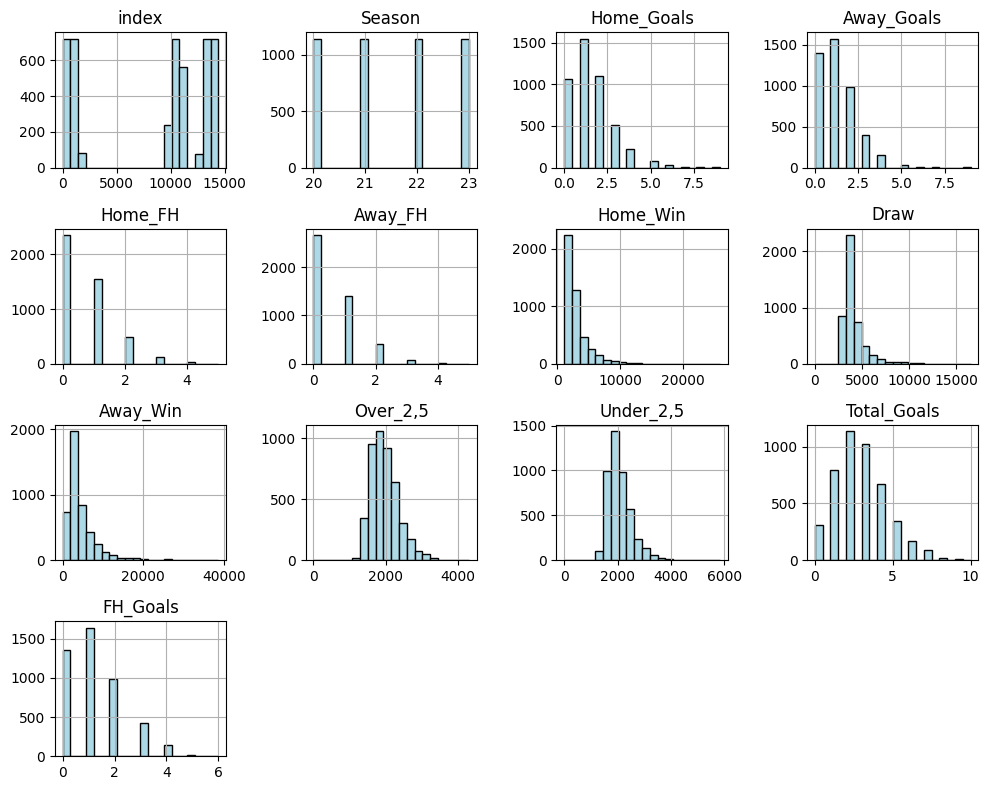

In [21]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data.hist(figsize=(10, 8), bins=20, edgecolor='k', color='lightblue')
plt.tight_layout()

# Pie Chart 

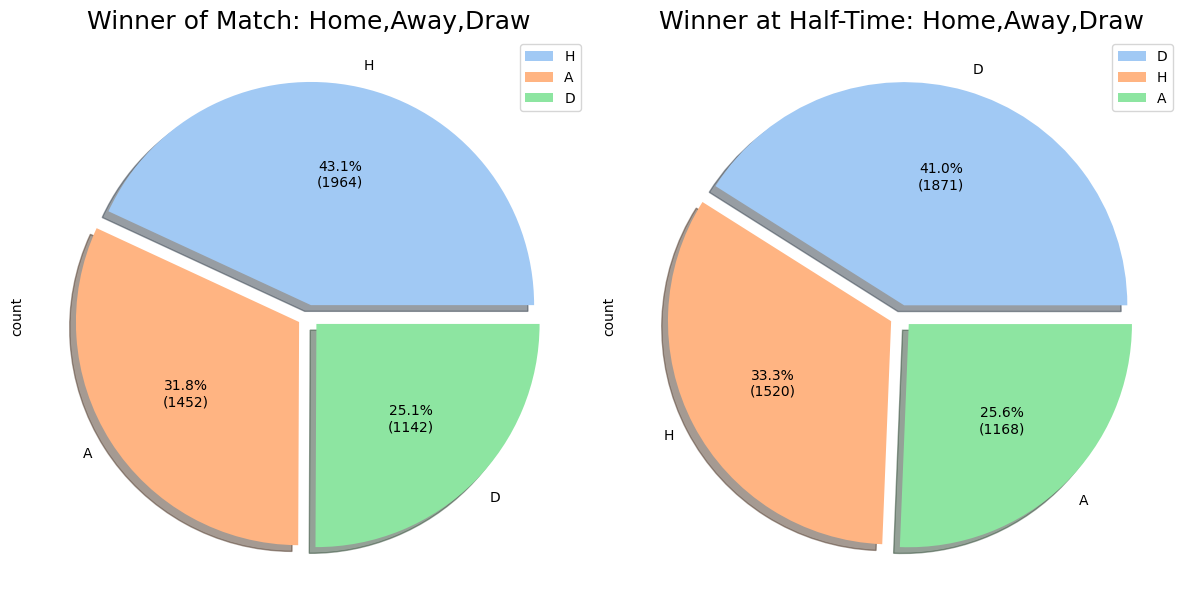

In [22]:

# Standardize the 'HT_Winner' column
df['HT_Winner'] = df['HT_Winner'].str.strip().str.upper()

# Plotting the Winner of the match at full-time and at half-time
plt.figure(figsize=(12, 8))
counts = df["Winner"].value_counts()     
# Full-time Winner Pie Chart
plt.subplot(1, 2, 1)
explode = [0.05,0.05, 0.05]  # Explode configuration
colors = sns.color_palette('pastel')[0:3]
autopct=lambda pct: f"{pct:.1f}%\n({int((pct/100)*counts.sum())})" 
df['Winner'].value_counts().plot.pie(
    explode=explode, 
    autopct=autopct, 
    colors=colors,
    shadow=True,
)
plt.title('Winner of Match: Home,Away,Draw',size=18)
plt.legend()

# Half-time Winner Pie Chart
plt.subplot(1, 2, 2)
df['HT_Winner'].value_counts().plot.pie(    
    explode=explode,
    autopct=autopct, 
    colors=colors,
    shadow=True
)
plt.title('Winner at Half-Time: Home,Away,Draw',size=18)
plt.legend()
plt.tight_layout()

## Bar Chart 

C:\Users\Dell\AppData\Local\Temp\ipykernel_10504\760233201.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


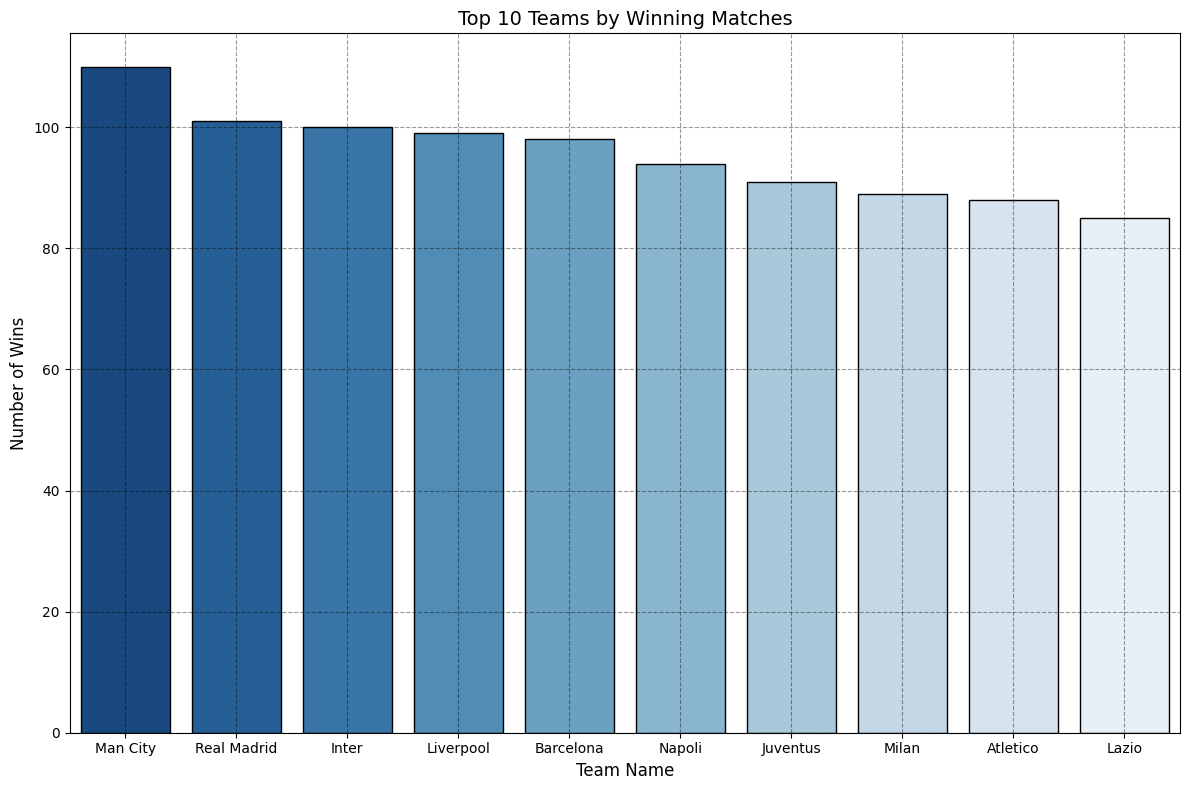

In [23]:

# Top 10 teams for winning matches
Top_Ten = df['Winner_Team'].value_counts()[1:11].reset_index()
Top_Ten.columns = ['Team', 'Number of Wins']

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=Top_Ten,
    x='Team',
    y='Number of Wins',
    palette='Blues_r',
    edgecolor='k'
    
)

# Add labels and title
plt.title('Top 10 Teams by Winning Matches', fontsize=14)
plt.xlabel('Team Name', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.grid(alpha=0.4, linestyle='--', color='black')
plt.xticks( fontsize=10)
plt.tight_layout()


## Scatter Plot 


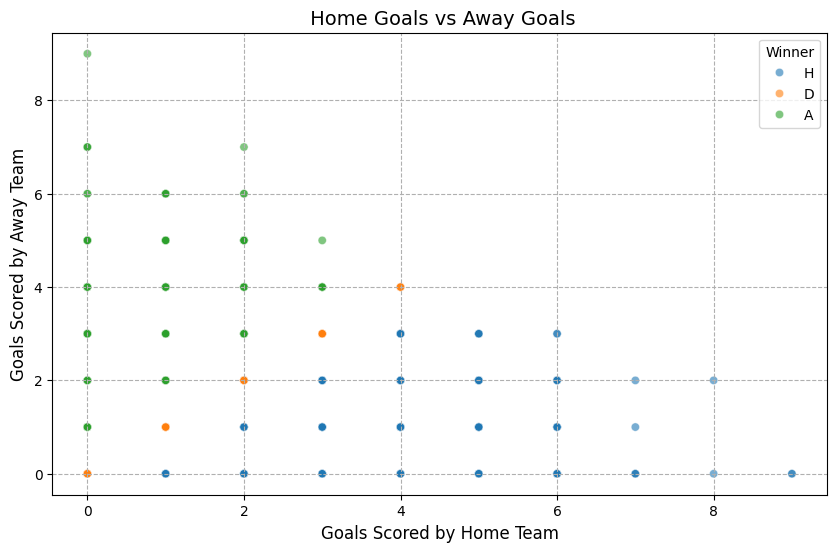

In [24]:
# Scatter plot for Goals_Home vs. Goals_Away
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Home_Goals', y='Away_Goals', color='pastel',hue="Winner" , alpha=0.6)

# Adding labels and title
plt.title(' Home Goals vs Away Goals', fontsize=14)
plt.xlabel('Goals Scored by Home Team', fontsize=12)
plt.ylabel('Goals Scored by Away Team', fontsize=12)
plt.grid(linestyle="--")

## Box Plot

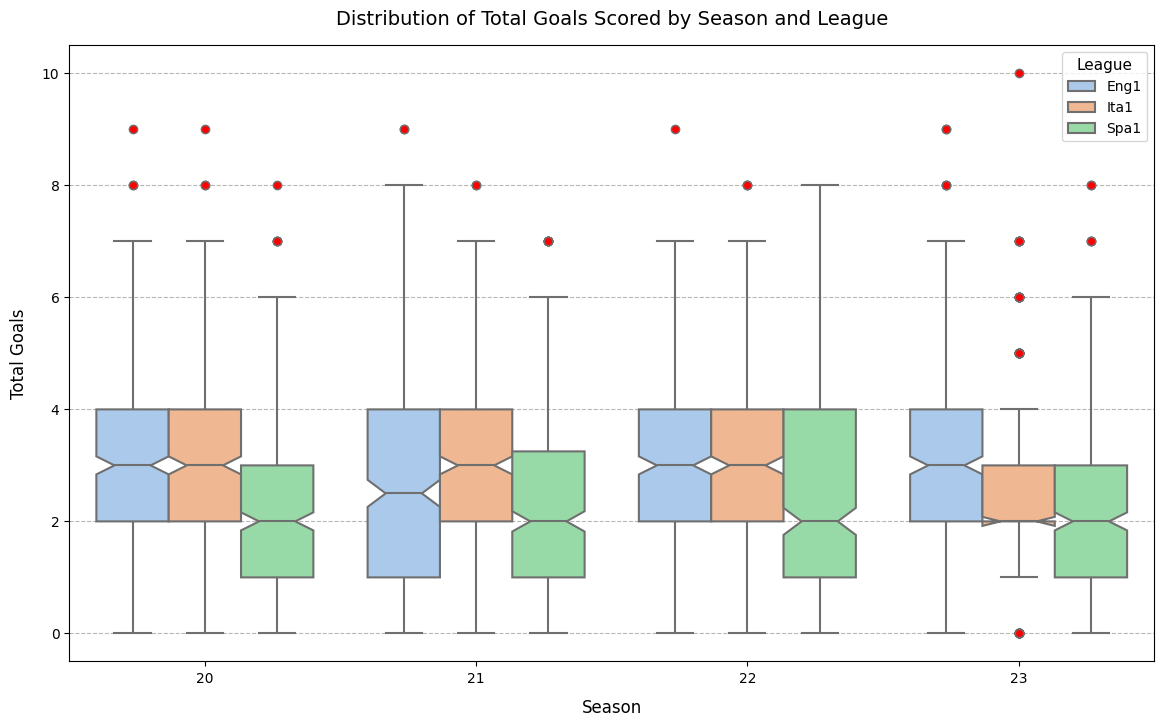

In [25]:
# Box plot for total goals scored by season 
flierprops=dict(markerfacecolor='r', marker='o')

plt.figure(figsize=(14,8))
sns.boxplot(data=df,y=df['Total_Goals'],x=df['Season'],hue = df['League'], linewidth = 1.5
           , notch = True, palette='pastel', flierprops = flierprops)

# Adding labels and title
plt.xlabel('Season', fontsize=12, labelpad=10)
plt.ylabel('Total Goals', fontsize=12, labelpad=10)
plt.title('Distribution of Total Goals Scored by Season and League', fontsize=14, pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.legend(title='League', fontsize=10, title_fontsize=11, loc='upper right')


C:\Users\Dell\AppData\Local\Temp\ipykernel_10504\1491165890.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


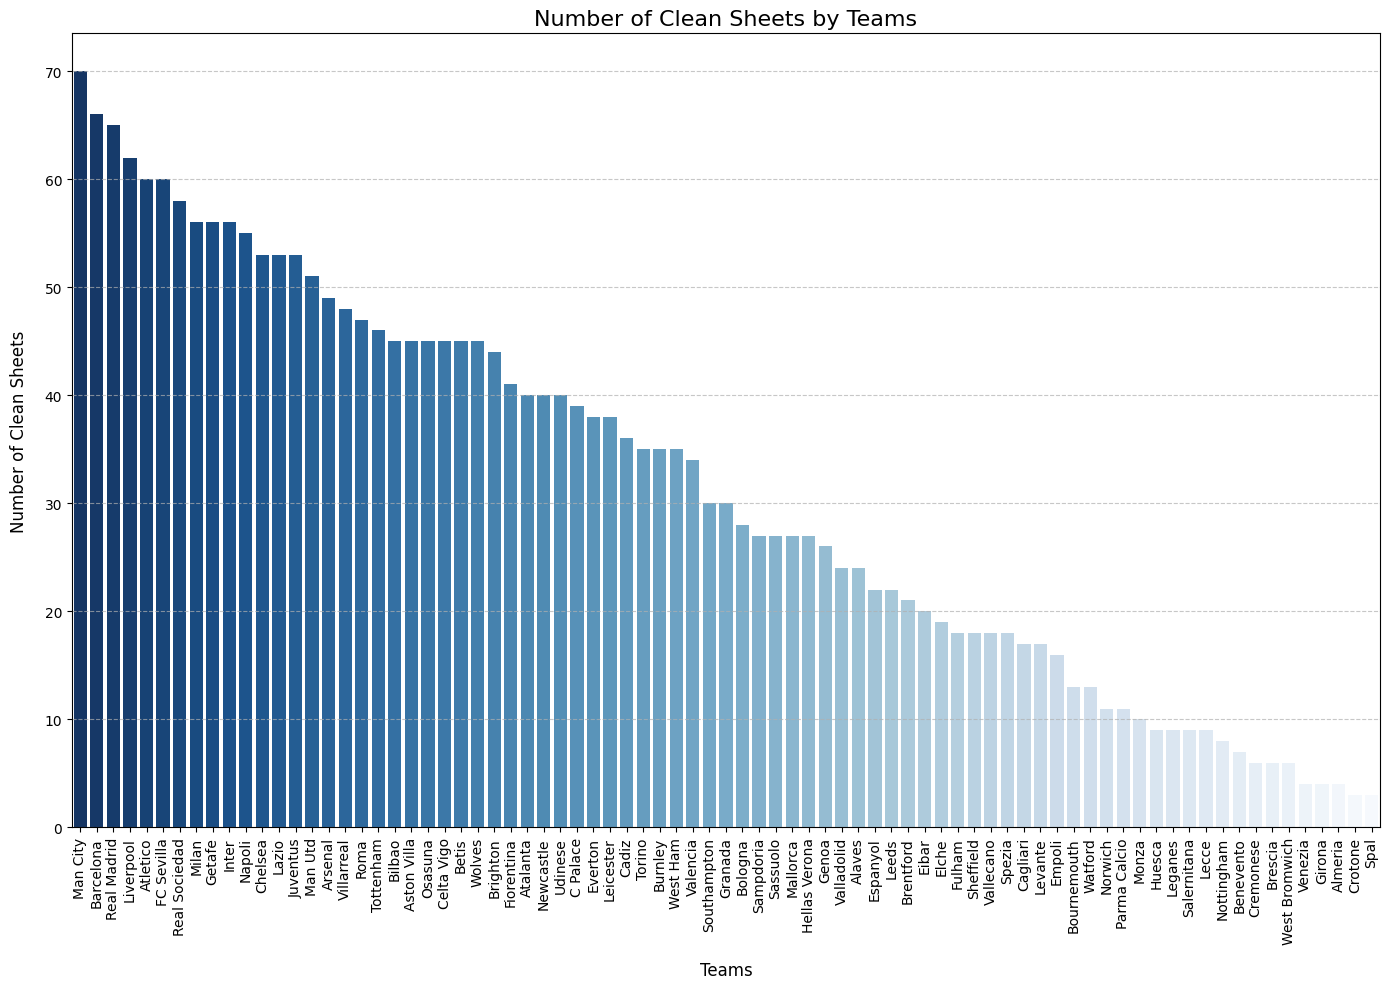

In [26]:
# Filter clean sheets for both home and away teams
clean_sheets = pd.concat([
    df[df['Home_Goals'] == 0][['Away_Team']].rename(columns={'Away_Team': 'Team'}),  # Away clean sheets
    df[df['Away_Goals'] == 0][['Home_Team']].rename(columns={'Home_Team': 'Team'})   # Home clean sheets
])

# Count clean sheets for each team
clean_sheet_counts = clean_sheets['Team'].value_counts().reset_index()
clean_sheet_counts.columns = ['Team', 'Number of Clean Sheets']

# Plot using Seaborn
plt.figure(figsize=(14, 10))
sns.barplot(
    data=clean_sheet_counts,
    x='Team',
    y='Number of Clean Sheets',
    palette='Blues_r'
)
plt.title("Number of Clean Sheets by Teams", fontsize=16)
plt.xlabel("Teams", fontsize=12, labelpad=12)
plt.ylabel("Number of Clean Sheets", fontsize=12, labelpad=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


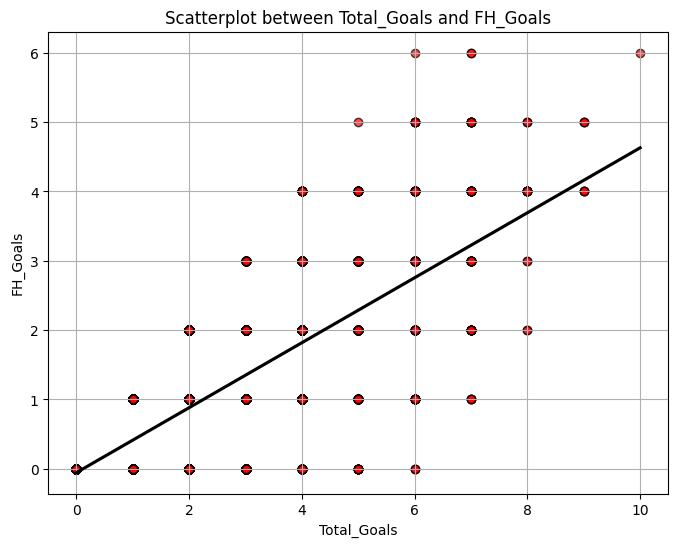

In [27]:
x_column = "Total_Goals"
y_column = "FH_Goals"

plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x=x_column,
    y=y_column,
    scatter_kws={'alpha': 0.7, 'color': 'r', 'edgecolor': 'k'},  # Customizes scatter points
    line_kws={'color': 'k'},  # Customizes the regression line
    ci=None  # Removes the confidence interval shading
)

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"Scatterplot between {x_column} and {y_column}")
plt.grid(True)
plt.show()


## Correlation Heatmap

Text(546.5815972222224, 0.5, 'Features')

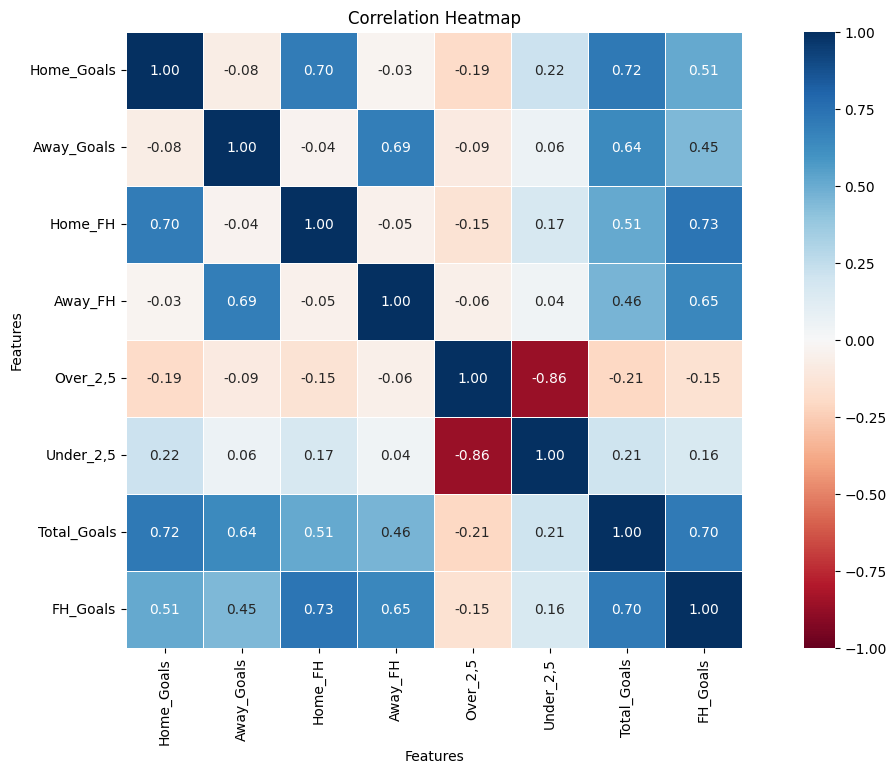

In [28]:
# creating a Heatmap for the Variables 
columns=['Home_Goals','Away_Goals','Home_FH','Away_FH','Over_2,5','Under_2,5','Total_Goals','FH_Goals']
data=df[columns]
corr=data.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr,cmap='RdBu',
            vmax=1,vmin=-1,
            annot=True,
            square=True,
            fmt = "0.2f", 
            linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)


# Prepare features
features = [
    'Home_Win', 'Draw', 'Away_Win', 
    'Total_Goals', 'FH_Goals',
      "Home_Team", "Away_Team",'HT_Winner'
]

# Encode categorical variables
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



# Prepare target variable
le = LabelEncoder()
df['Winner_Encoded'] = le.fit_transform(df['Winner']) 

# Separate features and target
X = df[features]
y = df['Winner_Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

rf_classifier=RandomForestClassifier(random_state=42)
rf_classifier=rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test)

# Performance Metrics
print("Accuracy Score:", (accuracy_score(y_test, y_pred)*100))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                             target_names=le.classes_))


Accuracy Score: 71.05263157894737

Confusion Matrix:
[[312  26  96]
 [ 77 201  77]
 [ 93  27 459]]

Classification Report:
              precision    recall  f1-score   support

           A       0.65      0.72      0.68       434
           D       0.79      0.57      0.66       355
           H       0.73      0.79      0.76       579

    accuracy                           0.71      1368
   macro avg       0.72      0.69      0.70      1368
weighted avg       0.72      0.71      0.71      1368

